# Importing Libraries:
- Pytorch and its modules like Transforms, Torchvision, Models etc.
- Sklearn for Training, Testing, for Classification Report and Confusion Matrix.
- Matplotlib for Ploting Graphs and charts.
- Seaborn is used to create plots and graphs to visualize the training and validation loss curves, accuracy metrics, confusion matrices, or the distribution of predicted and actual values.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Pre_trained MobileNet Model:
- ***Pre-trained models*** are often trained on large and diverse datasets, which helps them capture general patterns and features in the data.
- ***torch.hub.load*** is a PyTorch function that allows you to easily load pre-trained models and other resources.
- torch.hub.load is a convenient and efficient way to leverage the power of deep learning without having to train large neural networks from scratch.
- ***model.eval()*** we are preparing the model for making predictions or running inference on new data.

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

# Installing Torchsummary:

In [ ]:
!pip install torchsummary

# Loading Summary of the Model:

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary

# Define MobileNetV2 model
mobilenet = models.mobilenet_v2(pretrained=True)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mobilenet.to(device)

# Print model summary
summary(mobilenet, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

# Defining Loss Function and Optimizer:
- For classification tasks like image classification, ***CrossEntropyLoss*** is commonly used. It measures the dissimilarity between the predicted class probabilities and the true class labels.
- Optimizer helps to update the model's parameters to improve its performance over time.

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Defining Transformation Function:
- We have defined transformation function to transform the gray scale image to RGB image because MNIST handwritten dataset have grayscale images and MobileNet has colored channel.
- As both belongs to different channels to bring them on one channel we need to transform the dataset using transform function.

In [ ]:
# Define a preprocessing transformation to convert MNIST to RGB
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel grayscale
    transforms.Resize(224),  # Resize to match MobileNetV2 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Another Transformation for MNIST Dataset:

In [ ]:
# Apply the preprocessing transformation to the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=preprocess, download=True)


# Defining Batch_Size And Splitting the Dataset:
- In this we have define the batch size to 64, it means that we are giving 64 images at once to model during each iteration of training process.
- Splitting dataset into training and testing. In MNIST Dataset, we have 60,000 images for training the data and 10,000 images for testing the data.
- Test size is set to 0.2 which means 20% of the dataset is provided for testing and 80% is provided for training.
- This is done to avoid Underfitting and Overfitting of the model.

In [ ]:
batch_size = 64
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(mnist_with_preprocess, test_size=0.2, random_state=42)

# Creating DataLoaders for Training and Testing:
- Creating data loaders for training and testing is a crucial step in preparing and managing your data when training machine learning models.
- Shuffling the training data ensures that the model sees the data in a random order during each epoch.
- During testing or evaluation, you want your model to see the data in the same order each time to ensure consistent and reproducible evaluations.

In [ ]:
# Create data loaders for training and testing

trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Loading Pre-Trained MobileNetV2 Model:
- We load a MobileNet model to use in our own CNN Model.

In [ ]:
# Load the pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Modifying Classifier for MNIST Dataset:
- ***model.classifier[1]*** refers to the second layer (a fully connected layer) within the classifier part of the MobileNetV2 model.
- This modification replaces the original final classification layer of the MobileNetV2 model with a new one that is specifically designed to output predictions for the 10 classes of the MNIST dataset.
- The ***nn.Linear(num_ftrs, 10)*** statement creates a new linear layer where num_ftrs is the number of input features (determined from the original model), and 10 is the number of output features, corresponding to the 10 classes in the MNIST dataset.

In [ ]:
# Modify the model's classifier for MNIST (since MNIST has 10 classes)
num_ftrs = model.classifier[1].in_features #extracts the number of input features of the final fully connected layer (classifier) in the pre-trained model.
model.classifier[1] = nn.Linear(num_ftrs, 10) # replacing the existing final linear layer with a new one.


# Evaluating Training dataset Accuracy:
- Here i have used 10 epochs which means i will give whole dataset of Mnist 10 times to the model to do training.
- It will calculate training accuracy and training loss of the model by using this training function.
- This will help us to evaluate that how well our model is performing after using MobileNet model.

In [ ]:
# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

training_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()

    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    training_losses.append(running_loss / len(trainloader))

    # Print training loss and accuracy
    print(f"[Epoch {epoch + 1}] Training Loss: {running_loss / len(trainloader):.3f}, Training Accuracy: {train_accuracy:.2f}%")



[Epoch 1] Training Loss: 0.256, Training Accuracy: 92.42%
[Epoch 2] Training Loss: 0.061, Training Accuracy: 98.08%
[Epoch 3] Training Loss: 0.072, Training Accuracy: 97.83%
[Epoch 4] Training Loss: 0.060, Training Accuracy: 98.17%
[Epoch 5] Training Loss: 0.031, Training Accuracy: 99.10%
[Epoch 6] Training Loss: 0.037, Training Accuracy: 98.80%
[Epoch 7] Training Loss: 0.025, Training Accuracy: 99.25%
[Epoch 8] Training Loss: 0.011, Training Accuracy: 99.65%
[Epoch 9] Training Loss: 0.030, Training Accuracy: 98.92%
[Epoch 10] Training Loss: 0.045, Training Accuracy: 98.65%


# Evaluating Test Dataset Accuracy:
- Now we will have to calculate the testing accuracy of the model, for this we have used the test dataset and evaluate its accuracy.

In [ ]:

# Evaluate the model on the test set
model.eval()
correct_test = 0
total_test = 0

all_labels = []

all_predictions = []

# Create the test dataset using test_data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=preprocess, download=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

with torch.no_grad():
    for test_images, test_labels in testloader:
        test_images, test_labels = test_images.to(device), test_labels.to(device)

        test_outputs = model(test_images)
        _, test_predicted = torch.max(test_outputs.data, 1)

        all_labels.extend(test_labels.cpu().numpy())
        all_predictions.extend(test_predicted.cpu().numpy())

        total_test += test_labels.size(0)
        correct_test += (test_predicted == test_labels).sum().item()

test_accuracy = 100 * correct_test / total_test

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 98.40%


# Plotting Training Loss Graph:

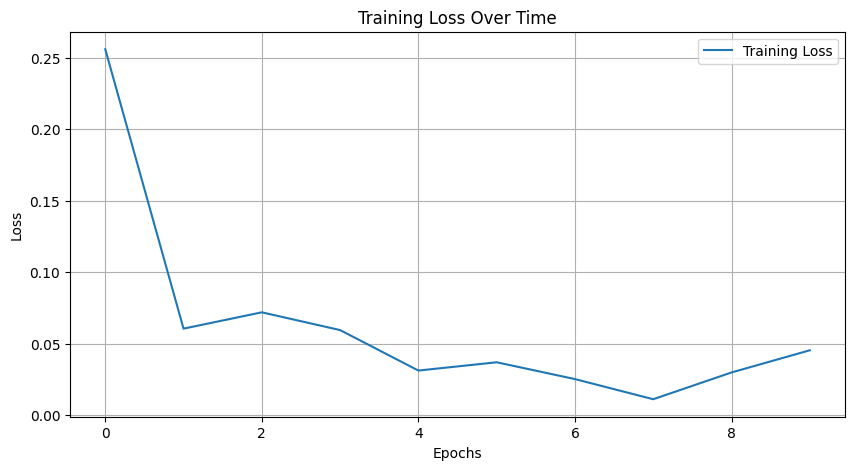

In [ ]:
# Plot the training loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Creating Confusion Matrix:
- A confusion matrix provides a detailed breakdown of the model's predictions for each class.
- It shows how many instances were correctly classified (true positives and true negatives) and how many were misclassified (false positives and false negatives) for each class.

In [ ]:
# Display the confusion matrix and classification report
cm = confusion_matrix(all_labels, all_predictions)
print("Test Confusion Matrix:")
print(cm)

Test Confusion Matrix:
[[ 967    0    0    0    0    4    7    0    2    0]
 [   0 1106    1   20    3    2    2    1    0    0]
 [   0    0 1020    1    0    0    4    5    1    1]
 [   0    0    0 1000    0    9    0    0    1    0]
 [   0    0    2    0  963    0    1    0    4   12]
 [   0    1    0    1    0  883    1    0    1    5]
 [   0    0    0    1    0    6  946    0    5    0]
 [   0    2   13    9    5    1    0  997    0    1]
 [   0    0    0    0    3    1    0    0  969    1]
 [   1    0    0    8    4    4    0    1    2  989]]


# Creating Classification Report:
- A classification report provides a concise summary of key performance metrics for each class, including accuracy, precision, recall, F1-score, and support.
- These metrics offer a high-level view of the model's performance on each class.

In [ ]:
report = classification_report(all_labels, all_predictions)
print("\nTest Classification Report:")
print(report)


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.97      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.96      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Plotting Confusion Matrix:
- ***sns.heatmap*** is a function from the seaborn library for creating heatmap visualizations.
- The resulting visualization is a heatmap that provides a visual representation of the confusion matrix, making it easier to interpret and analyze the model's performance on different classes.
- Darker shades of blue in the heatmap represent higher counts or values in the confusion matrix. These typically correspond to correct predictions (true positives and true negatives).
- Lighter shades of blue represent lower counts or values in the confusion matrix. These usually correspond to incorrect predictions (false positives and false negatives).

<Axes: >

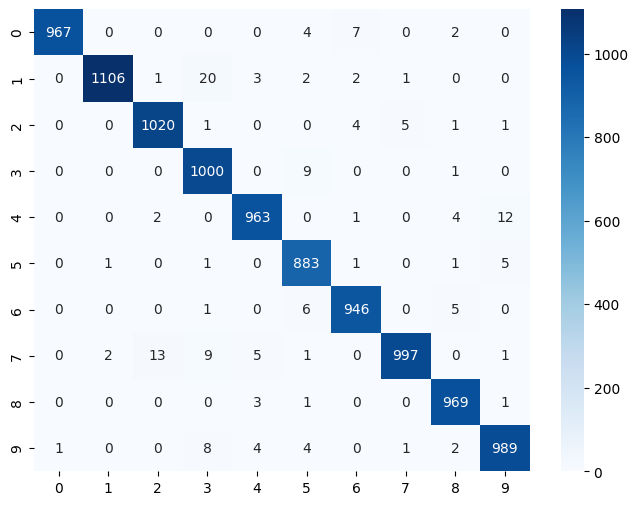

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")